<!-- Notebook Header Start -->

<h1 align="center">Running Kilosort & Analyzing Data</h1>

<p align="center">
  <strong>Author:</strong> Karl Bates<br>
  <strong>Date:</strong> 2024-11-18<br>
  <strong>Affiliation:</strong> Carnegie Mellon University, Cohen-Karni Lab  || Neuromechatronics Lab
</p>

---


## 📊 Notebook Outline

* **Importing binary files from SpikeInterface**
* **Running Kilosort spike sorting on the datasets of interest**
* **Importing the results of Kilosort back into Python for analysis / plotting**


## 📚 References & Additional Resources

- [Kilosort4 docs](https://github.com/MouseLand/Kilosort/tree/main)
- [SpikeInterface docs](https://github.com/SpikeInterface)

---

<!-- Notebook Header End -->


# 🧾 Importing Libraries & Data
---

### import libraries

In [1]:
# standard imports
from pathlib import Path
import os
import pandas as pd
import numpy as np
from kilosort import io
import matplotlib.pyplot as plt

# custom imports
from automations import RM1
from automations import SpikeInterface_wrapper
from automations import Kilosort_wrapper
from automations import plots

### filepath & probe definition

Using the spreadsheet, `Adapter_pinout.xlsx`, the contact ID's can be traced to the "device channel", and we can assign them on the probe. 

In this case, our channel indices correspond to the aux inputs to the intan headstage.

refer to the notebook, `RM1_pipeline.ipynb` within  the `dev_notebook` folder

In [2]:
# Path definitions
SAVE_DIRECTORY = Path(fr'D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.005 Initial Analysis, DW327')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
DATA_DIRECTORY = Path(fr'D:\SynologyDrive\CMU.80 Data\82 External Data\82.002 Sample Rat Data from RM1 Project')  # NOTE Specify the path where the data will be copied to, and where Kilosort4 results will be saved.
# Create path if it doesn't exist
DATA_DIRECTORY.mkdir(parents=True, exist_ok=True)
SAVE_DIRECTORY.mkdir(parents=True, exist_ok=True)
PROBE_DIRECTORY = Path(r'D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.001 A1x32-Edge-5mm-20-177-A32\A1x32-Edge-5mm-20-177-A32.prb')

# 📈 Trial Summary
---

This is used to determine which trial is most likely to produce good units in a spike sorting analysis

### process data for import into Kilosort

I will use a combination of `SpikeInterface` & `Kilosort.io.extractors` to get the data I need

In [3]:
spikes = Kilosort_wrapper(SAVE_DIRECTORY,PROBE_DIRECTORY)

Preparing Kilosort wrapper for DW327


In [4]:
spikes.run_kilosort_trial_summary()

kilosort.run_kilosort: Kilosort version 4.0.30
kilosort.run_kilosort: Python version 3.9.21
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.26100-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 25 Model 97 Stepping 2, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce RTX 4070 Ti SUPER 15.99GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.005 Initial Analysis, DW327\binary\DRGS_10_241125_150417\DW327_DRGS_10_241125_150417_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -----------------


Running kilosort on DRGS_10_241125_150417

Error processing folder DRGS_10_241125_150417: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_11_241125_151101

Error processing folder DRGS_11_241125_151101: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_12_241125_151746



kilosort.run_kilosort: Kilosort version 4.0.30
kilosort.run_kilosort: Python version 3.9.21
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.26100-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 25 Model 97 Stepping 2, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce RTX 4070 Ti SUPER 15.99GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.005 Initial Analysis, DW327\binary\DRGS_1_241125_134024\DW327_DRGS_1_241125_134024_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------

Error processing folder DRGS_12_241125_151746: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_1_241125_134024



kilosort.run_kilosort: Kilosort version 4.0.30
kilosort.run_kilosort: Python version 3.9.21
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.26100-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 25 Model 97 Stepping 2, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce RTX 4070 Ti SUPER 15.99GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.005 Initial Analysis, DW327\binary\DRGS_2_241125_140406\DW327_DRGS_2_241125_140406_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: -------------------

Error processing folder DRGS_1_241125_134024: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_2_241125_140406

Error processing folder DRGS_2_241125_140406: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_3_241125_141057

Error processing folder DRGS_3_241125_141057: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_4_241125_141635



kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:    14.40 %
kilosort.run_kilosort: Memory:       25.96 %     |     33.00   /   127.10 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:    9.30 %     |      1.49   /    15.99 GB
kilosort.run_kilosort: Allocated:     0.05 %     |      0.01   /    15.99 GB
kilosort.run_kilosort: Max alloc:     0.73 %     |      0.12   /    15.99 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: ----------------------------------------
kilosort.spikedetect: Re-computing universal templates from data.
kilosort.spikedetect: Number of universal temp

Custom labels applied and saved for trial: DRGS_4_241125_141635

Running kilosort on DRGS_5_241125_142348

Error processing folder DRGS_5_241125_142348: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_6_241125_143021

Error processing folder DRGS_6_241125_143021: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_7_241125_143654

Error processing folder DRGS_7_241125_143654: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_8_241125_144608

Error processing folder DRGS_8_241125_144608: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on DRGS_9_241125_145318

Error processing folder DRGS_9_241125_145318: [WinError 388] The cloud sync provider failed to perform the operation due 

kilosort.run_kilosort: System information:
kilosort.run_kilosort: Windows-10-10.0.26100-SP0 AMD64
kilosort.run_kilosort: AMD64 Family 25 Model 97 Stepping 2, AuthenticAMD
kilosort.run_kilosort: Using GPU for PyTorch computations. Specify `device` to change this.
kilosort.run_kilosort: Using CUDA device: NVIDIA GeForce RTX 4070 Ti SUPER 15.99GB
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Sorting D:\SynologyDrive\CMU.80 Data\88 Analyzed Data\88.005 Initial Analysis, DW327\binary\VF_7_241125_161126\DW327_VF_7_241125_161126_data.bin
kilosort.run_kilosort: Interpreting binary file as default dtype='int16'. If data was saved in a different format, specify `data_dtype`.
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: Encountered error in `run_kilosort`:
Traceback (most recent call last):
  File "c:\Users\Karl\Documents\_Python\CMU

Error processing folder VF_7_241125_161126: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on VF_8_241125_161626

Error processing folder VF_8_241125_161626: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable

Running kilosort on VF_9_241125_162141

Error processing folder VF_9_241125_162141: [WinError 388] The cloud sync provider failed to perform the operation due to network being unavailable


# ⏩ Import Kilosort Outputs (if they exist)

when kilosort is run, it creates a series of files saved next to the binary files.
use this method to import them. if there are no kilosort files, it will pass

In [5]:
spikes = Kilosort_wrapper(SAVE_DIRECTORY,PROBE_DIRECTORY)

Preparing Kilosort wrapper for DW327


In [6]:
spikes.extract_kilosort_outputs()

Kilosort outputs successfully loaded for trial: DRGS_10_241125_150417
Kilosort outputs successfully loaded for trial: DRGS_11_241125_151101
Kilosort outputs successfully loaded for trial: DRGS_12_241125_151746
Kilosort outputs successfully loaded for trial: DRGS_1_241125_134024
Kilosort outputs successfully loaded for trial: DRGS_2_241125_140406
Kilosort outputs successfully loaded for trial: DRGS_3_241125_141057
Kilosort outputs successfully loaded for trial: DRGS_4_241125_141635
Kilosort outputs successfully loaded for trial: DRGS_5_241125_142348
Kilosort outputs successfully loaded for trial: DRGS_6_241125_143021
Kilosort outputs successfully loaded for trial: DRGS_7_241125_143654
Kilosort outputs successfully loaded for trial: DRGS_8_241125_144608
Kilosort outputs successfully loaded for trial: DRGS_9_241125_145318
Kilosort outputs successfully loaded for trial: VF_10_241125_162725
Kilosort outputs successfully loaded for trial: VF_1_241125_153746
Kilosort outputs successfully load

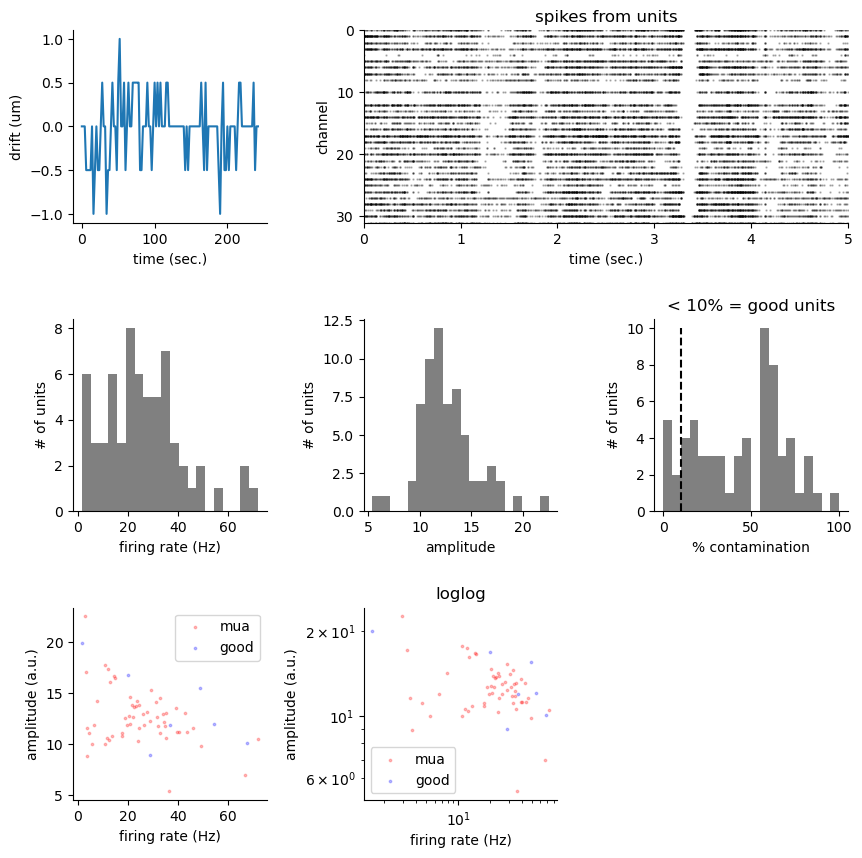

Plotting good units for trial: VF_1_241125_153746


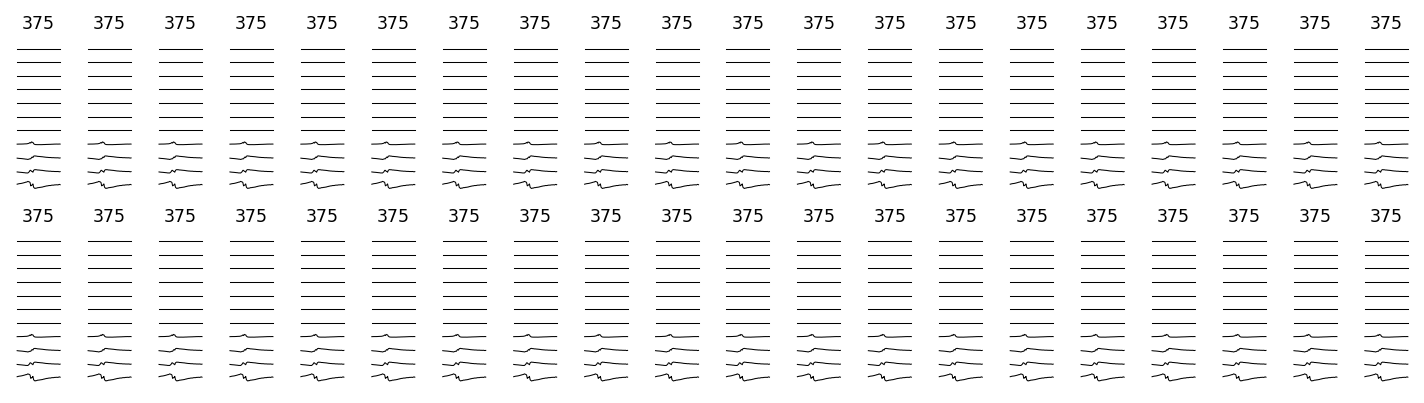

Plotting mua units for trial: VF_1_241125_153746


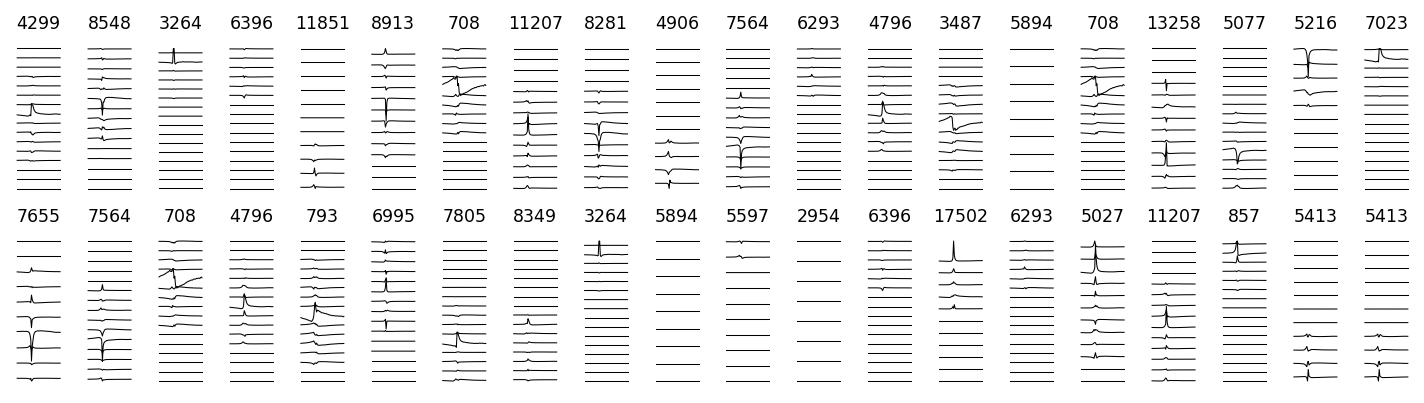

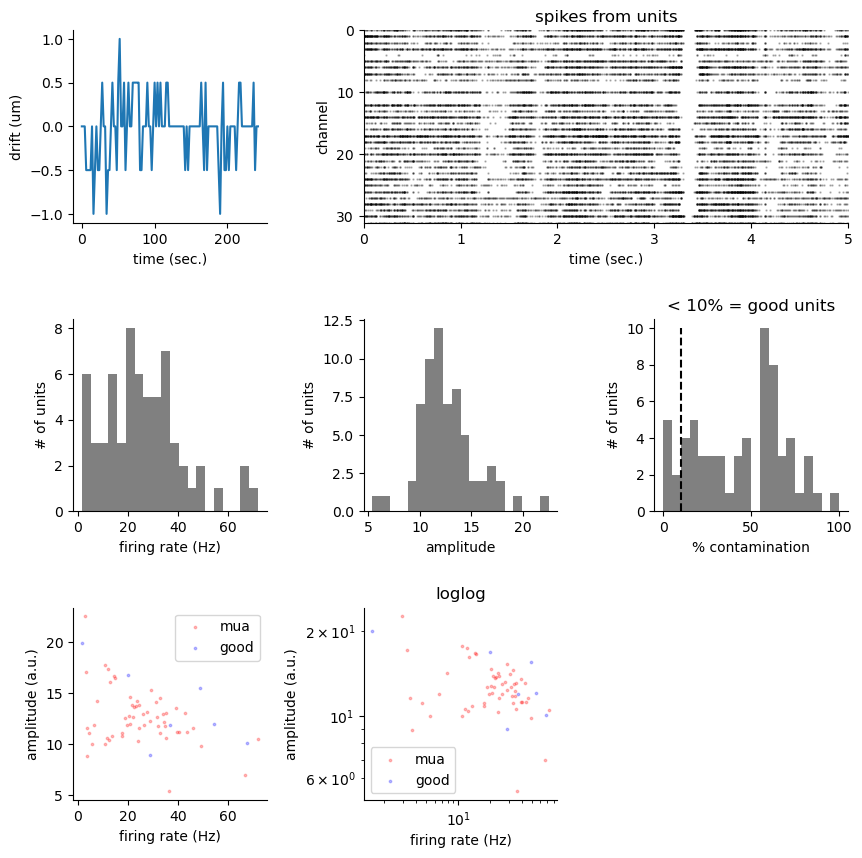

Plotting good units for trial: VF_1_241125_153746


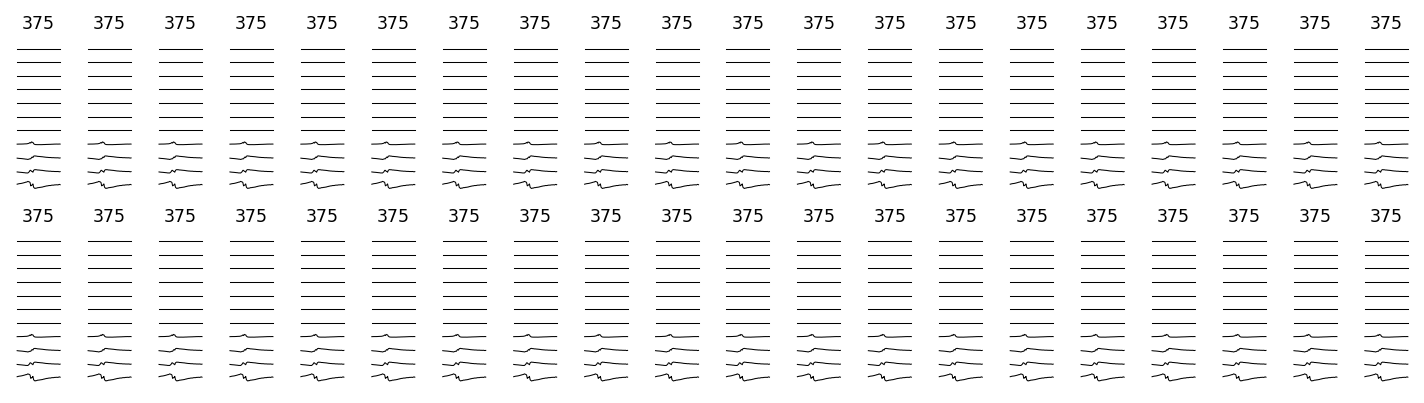

Plotting mua units for trial: VF_1_241125_153746


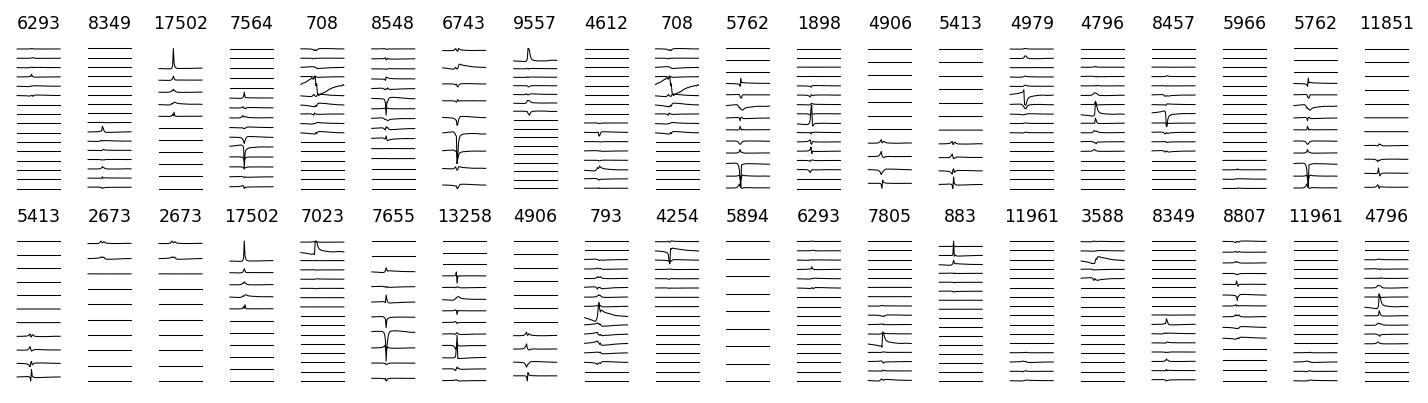

In [7]:
spikes.plot_trial_results(["VF_1_241125_153746","VF_1_241125_153746"])

- **`ops`**: Loads the Kilosort options dictionary, which includes parameters and processing information.
- **`cluster_amplitudes` & `contamination_percentage`**: Load cluster amplitudes and contamination percentages from TSV files.
- **`channel_mapping`**: Loads the mapping of electrode channels.
- **`templates`**: Loads the spike waveform templates.
- **`chan_best`**: Identifies the best (most representative) channel for each template by finding the channel with the maximum energy (sum of squared amplitudes).
- **`amplitudes`**: Loads the amplitudes of detected spikes.
- **`spike_times`**: Loads spike times, typically in sample indices.
- **`spike_clusters`**: Loads cluster assignments for each spike.
- **`firing_rates`**: Calculates the firing rate for each unit (cluster) by counting the number of spikes and normalizing by the total recording time.
- **`dshift`**: Extracts the drift shift values from the options dictionary, which indicates the movement of the recording probe over time.

In [8]:
st = spikes.kilosort_results["VF_8_241125_161626"]["spike_times"]
clu = spikes.kilosort_results["VF_8_241125_161626"]["spike_clusters"]
templates = spikes.kilosort_results["VF_8_241125_161626"]["templates"]
chan_map = spikes.kilosort_results["VF_8_241125_161626"]["channel_mapping"]
chan_best = spikes.kilosort_results["VF_8_241125_161626"]["chan_best"]

# 📊 Example: Pretty Raster Plot

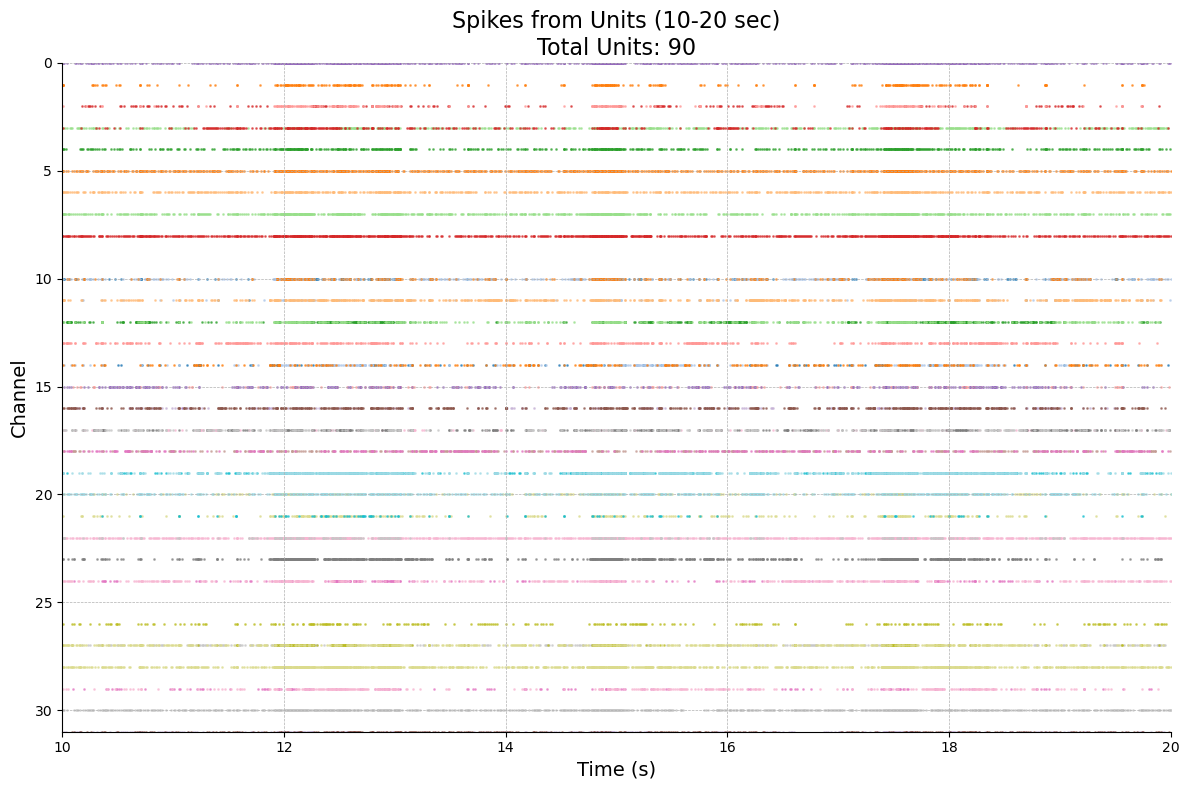

In [9]:
# Define the specific time window in seconds
time_window_start = 10  # Start time in seconds
time_window_end = 20    # End time in seconds

# Convert the time window to indices
t_start_index = np.searchsorted(st, time_window_start * 30000)  # Convert to sample index
t_end_index = np.searchsorted(st, time_window_end * 30000)

# Extract spike times and corresponding channels within the time window
spike_times = st[t_start_index:t_end_index] / 30000.  # Convert to seconds
spike_clusters = clu[t_start_index:t_end_index]
spike_channels = chan_best[spike_clusters]

# Create a figure with a larger size for better visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Use a colormap to represent different units or clusters
clusters = np.unique(spike_clusters)
num_clusters = len(clusters)
cmap = plt.get_cmap('tab20', num_clusters)

# Map each cluster to a color
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(clusters)}

# Plot spikes for each cluster with its assigned color
for cluster in clusters:
    idx = spike_clusters == cluster
    ax.scatter(spike_times[idx], spike_channels[idx],
               s=1, color=cluster_colors[cluster], alpha=0.6)

# Set x-axis limits to the specified time window
ax.set_xlim([time_window_start, time_window_end])
ax.set_ylim([chan_map.max(), chan_map.min()])
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Channel', fontsize=14)
ax.set_title(f'Spikes from Units ({time_window_start}-{time_window_end} sec)\nTotal Units: {num_clusters}', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# 🔄Example: Calculate Firing Rate Per Unit During a Time Window

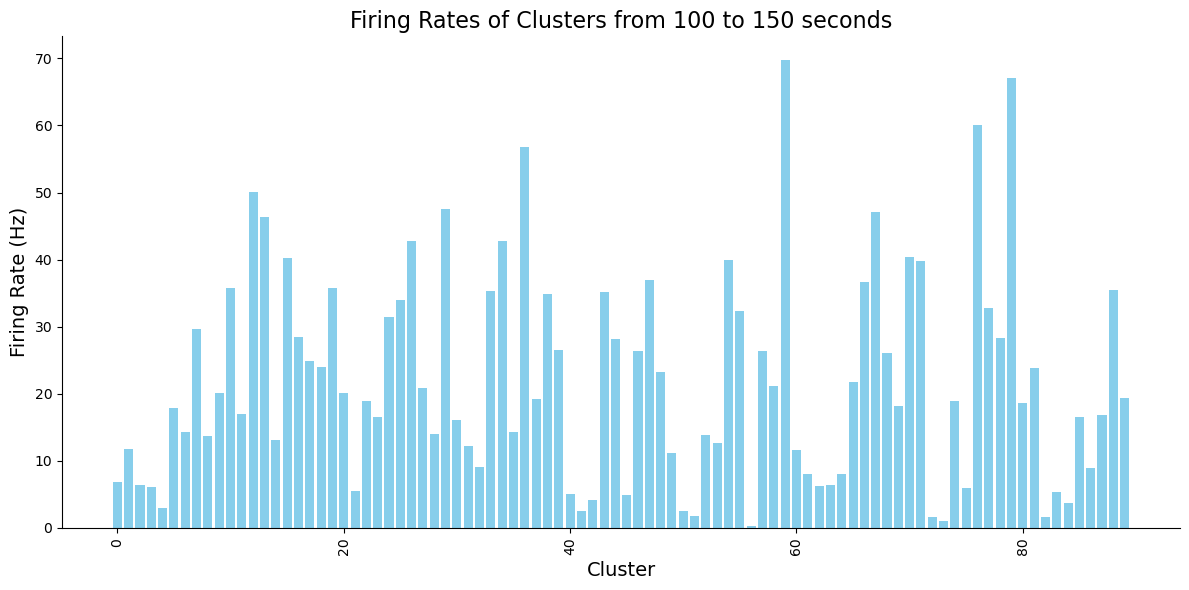

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assume st, clu, and chan_best are already defined

# Define the specific time window in seconds
time_window_start = 100  # Start time in seconds
time_window_end = 150    # End time in seconds

# Convert the time window to indices
t_start_index = np.searchsorted(st, time_window_start * 30000)  # Convert to sample index
t_end_index = np.searchsorted(st, time_window_end * 30000)

# Extract spike times and corresponding clusters within the time window
spike_times_window = st[t_start_index:t_end_index] / 30000.  # Convert to seconds
spike_clusters_window = clu[t_start_index:t_end_index]

# Calculate the duration of the time window
window_duration = time_window_end - time_window_start  # Duration in seconds

# Count the number of spikes per cluster within the time window
cluster_spike_counts = Counter(spike_clusters_window)

# Get all clusters present in the entire recording
all_clusters = np.unique(clu)

# Initialize firing rates with zero for all clusters
firing_rates = {cluster: 0 for cluster in all_clusters}

# Compute firing rates
for cluster in all_clusters:
    count = cluster_spike_counts.get(cluster, 0)
    firing_rates[cluster] = count / window_duration

# Create a DataFrame
firing_rates_df = pd.DataFrame(list(firing_rates.items()), columns=['Cluster', 'Firing Rate (Hz)'])

# Sort the DataFrame by firing rate
firing_rates_df = firing_rates_df.sort_values(by='Firing Rate (Hz)', ascending=False)

# Visualize the firing rates
plt.figure(figsize=(12, 6))
plt.bar(firing_rates_df['Cluster'], firing_rates_df['Firing Rate (Hz)'], color='skyblue')
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Firing Rate (Hz)', fontsize=14)
plt.title(f'Firing Rates of Clusters from {time_window_start} to {time_window_end} seconds', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
firing_rates_df

,Cluster,Firing Rate (Hz)
59,59,69.80
79,79,67.14
76,76,60.00
36,36,56.72
12,12,50.04
...,...,...
51,51,1.72
72,72,1.62
82,82,1.60
73,73,1.08
